<a href="https://colab.research.google.com/github/shakin-shahria/YOLOv8-Object-Detection/blob/main/trx_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Apr 20 15:20:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5608.0/8062.4 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#Training the model
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/input/routing/data.yaml epochs=25 imgsz=640 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 154MB/s]
New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/routing/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [ ]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch2.jpg
P_curve.png					  train_batch3600.jpg
R_curve.png					  train_batch3601.jpg
args.yaml					  train_batch3602.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1713626560.e99199acfdbe.94.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


In [ ]:
#validation process
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/kaggle/input/routing/data.yaml

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11136807 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/input/dataset/valid/labels... 158 images, 0 backgrounds, 0
val: WARNING ⚠️ Cache directory /kaggle/input/dataset/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 446, len(boxes) = 462. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        158        462      0.455      0.266      0.286      0.231
        Aluminium foil        158          5      0.696        0.6      0.697       0.57
            Bottle cap        158         25      0.581       0.32        0.4      0.271
             Cigarette   

/kaggle/working


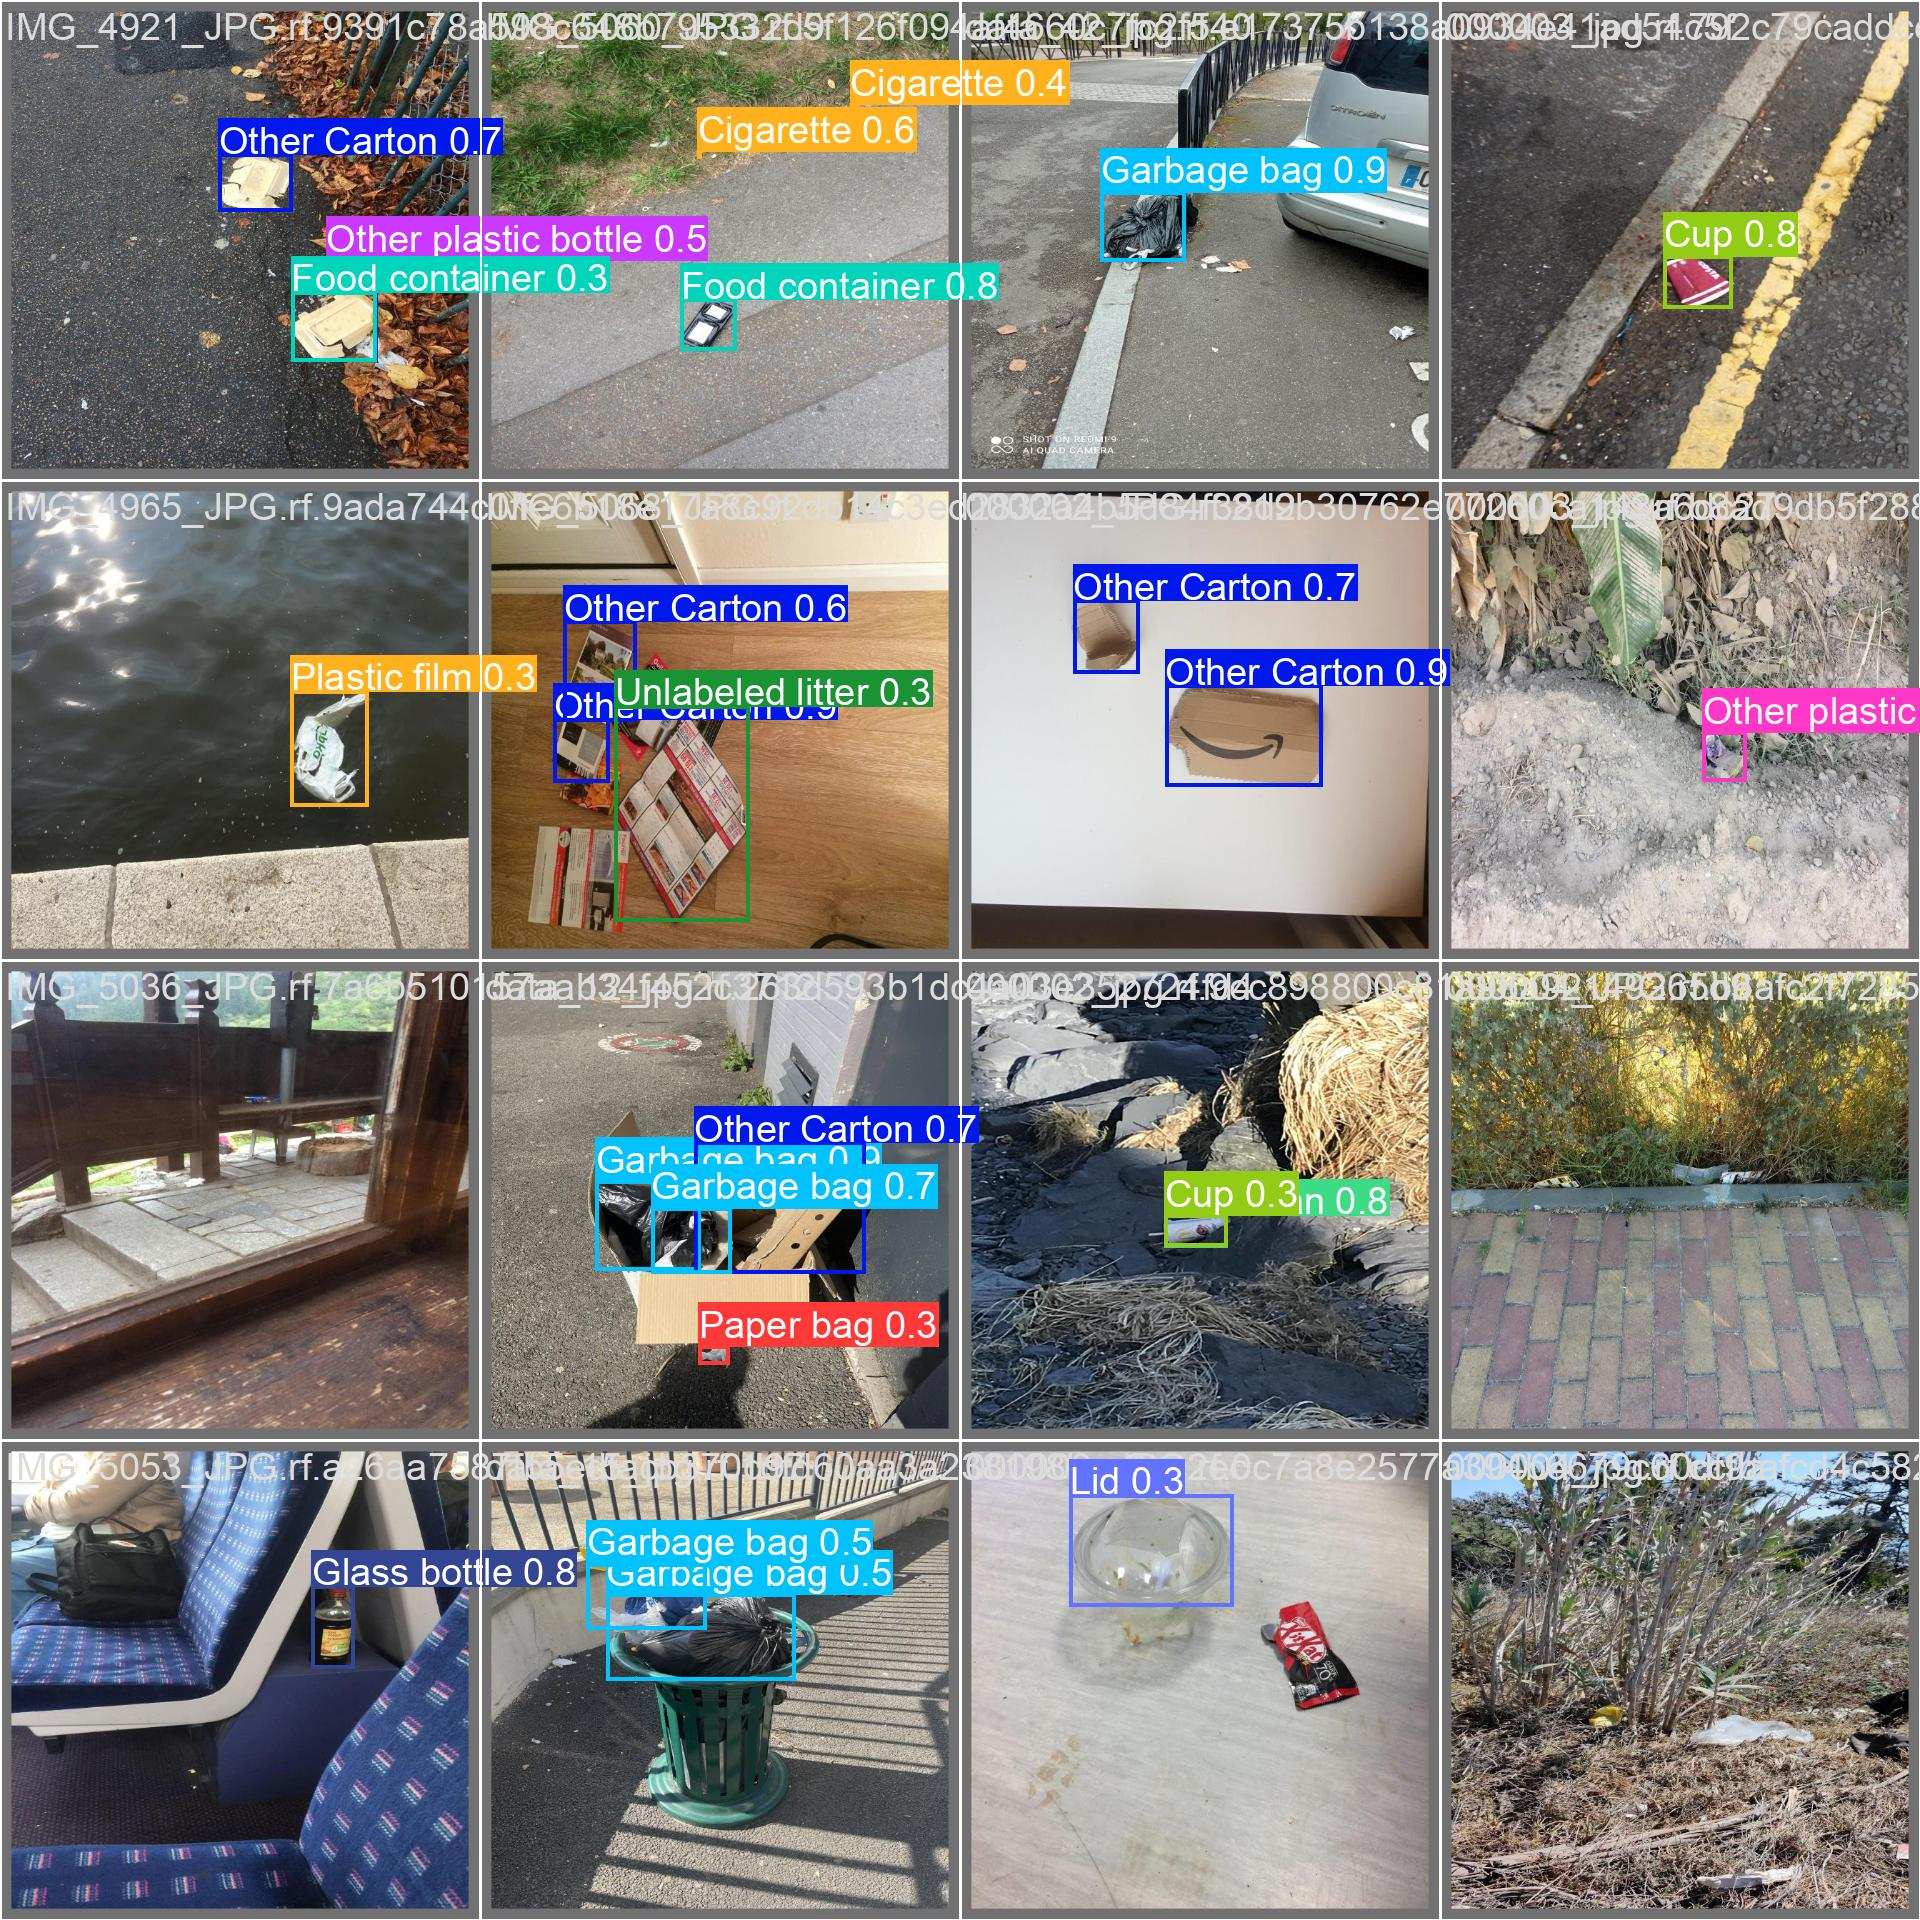

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
#testing the model
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/dataset/test/images save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11136807 parameters, 0 gradients, 28.5 GFLOPs

image 1/159 /kaggle/input/dataset/test/images/000000_jpg.rf.e3fe7e2f0223906d4a754b6650db1cc1.jpg: 640x640 1 Drink can, 1 Lid, 1 Other plastic, 1 Straw, 16.4ms
image 2/159 /kaggle/input/dataset/test/images/000001_JPG.rf.74374d550f5b0299284313ff86688c4a.jpg: 640x640 1 Bottle cap, 16.5ms
image 3/159 /kaggle/input/dataset/test/images/000002_jpg.rf.4c25aae77ac54f9f6e32f9884134f387.jpg: 640x640 1 Plastic film, 16.4ms
image 4/159 /kaggle/input/dataset/test/images/000006_jpg.rf.457a95ab01fe990be13b7c8052bbc869.jpg: 640x640 1 Bottle cap, 1 Drink can, 16.4ms
image 5/159 /kaggle/input/dataset/test/images/000007_jpg.rf.7752ae2b3099a6e651d547e113628498.jpg: 640x640 (no detections), 16.4ms
image 6/159 /kaggle/input/dataset/test/images/000007_jpg.rf.c0f814284cabc5ce62f8d2e5c835f62e.jpg: 640x640 1 Other plastic, 4 Paper bags

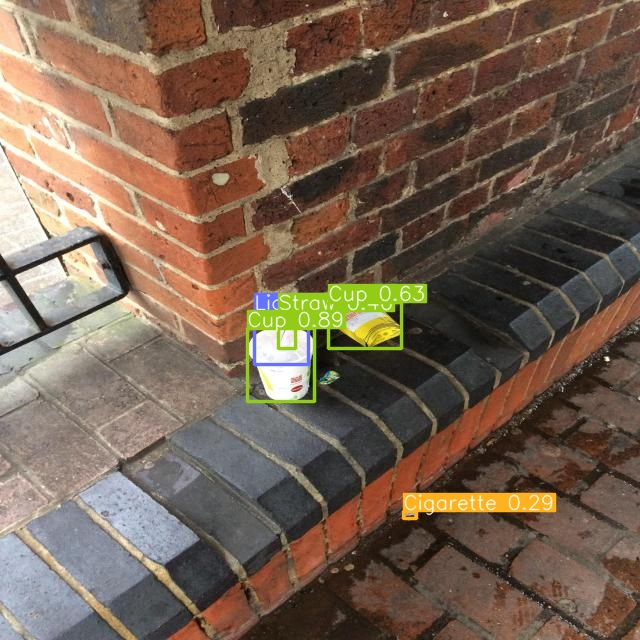

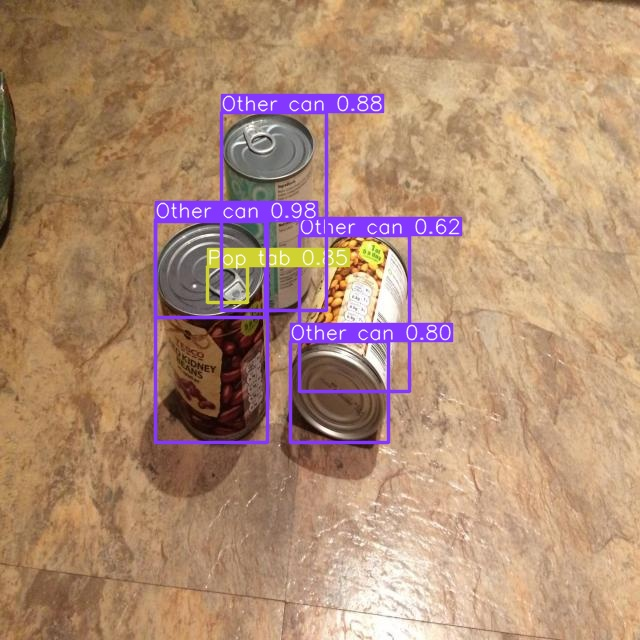

In [ ]:
#presentinn some of the test cases
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[2:4]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
# Precision and recall values for each class
precision_values = [0.855, 0.696, 0.981, 0.661, 0.504, 0.757, 0.928, 0.849, 0.89, 0.883, 0.567, 0.748, 0.906, 0.79, 0.63, 0.659, 1, 1, 0.735, 1, 0.635, 0.787, 0.927, 0.415, 0.97, 1, 0.56, 0.87, 1]
recall_values = [0.766, 1, 0.62, 0.724, 1, 0.9, 0.574, 0.517, 0.89, 0.9716, 0.833, 0.871, 0.867, 1, 0.829, 1, 0, 1, 0.715, 1, 0, 0.776, 0.543, 0.774, 0.78, 1, 0.67, 1, 0.886]

num_images = 158

# Calculate TP, FP, FN for each class and sum them up
TP_sum = sum([recall * num_images for recall in recall_values])
FP_sum = sum([(1 - precision) * num_images for precision in precision_values])
FN_sum = sum([(1 - recall) * num_images for recall in recall_values])

# Calculate accuracy, precision, recall, and F1 score
accuracy = TP_sum / (TP_sum + FP_sum + FN_sum)
precision = TP_sum / (TP_sum + FP_sum)
recall = TP_sum / (TP_sum + FN_sum)
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Accuracy: 0.6467971376842832
Precision: 0.795185064797411
Recall: 0.7760896551724138
F1 Score: 0.7855213285029212


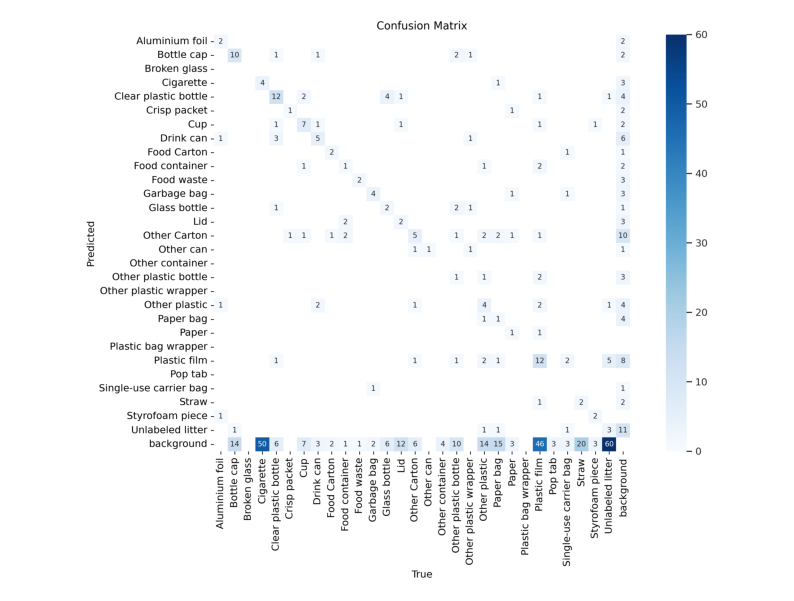

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the confusion matrix image
image_path = "/kaggle/working/runs/detect/val/confusion_matrix.png"

# Load and display the image with larger size
plt.figure(figsize=(10, 8))  # Adjust the size as needed
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


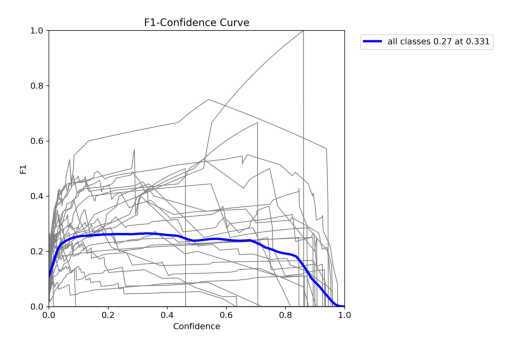

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the F1 curve image
image_path = "/kaggle/working/runs/detect/val/F1_curve.png"

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


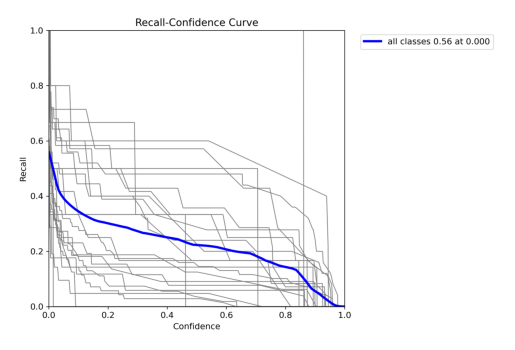

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the F1 curve image
image_path = "/kaggle/working/runs/detect/val/R_curve.png"

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


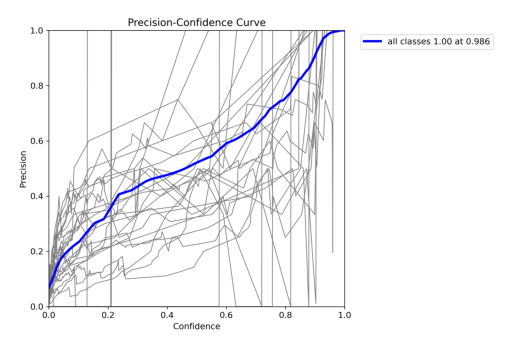

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the F1 curve image
image_path = "/kaggle/working/runs/detect/val/P_curve.png"

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()


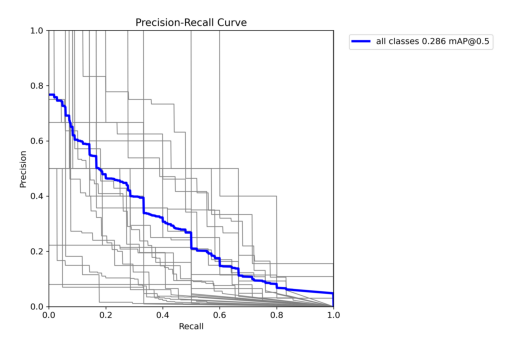

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the F1 curve image
image_path = "/kaggle/working/runs/detect/val/PR_curve.png"

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()
